In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno
import zipfile
import os
from utils import linmodules as lm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Preparing Dataset and Quick Cleaning

#### 1. Downloading and extracting

In [35]:
!kaggle datasets download -d mirichoi0218/insurance

  0%|                                               | 0.00/16.0k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 16.0k/16.0k [00:00<00:00, 1.30MB/s]


In [36]:
data_path = "./data/insurance"
os.makedirs(data_path, exist_ok=False)

FileExistsError: [Errno 17] File exists: './data/insurance'

In [ ]:
with zipfile.ZipFile("./insurance.zip", "r") as ins:
    ins.extractall("./data/insurance")

In [ ]:
!rm -rf *.zip

#### 2. Reading data

In [37]:
raw_df = pd.read_csv("./data/insurance/insurance.csv", header=0, sep=",")

Exploring columns, dtypes, and general poblational trends.

In [38]:
raw_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
raw_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [40]:
raw_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [41]:
raw_df.describe(include=['float', 'int'])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Inspecting missing or null values:

In [42]:
raw_df.isna().sum() # It is apparently clean

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [77]:
raw_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

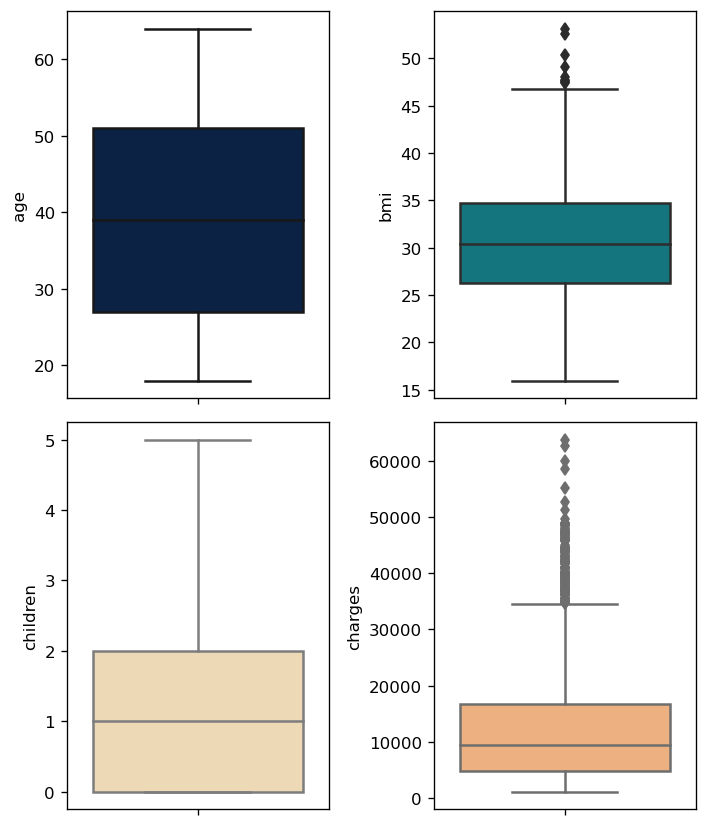

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,7), dpi=120, sharex=False, sharey=False)
sns.boxplot(data=raw_df, y="age", hue="sex", showfliers=True, ax=axes.flat[0], color="#01204E")
sns.boxplot(data=raw_df, y="bmi", hue="sex", showfliers=True, ax=axes.flat[1], color="#028391")
sns.boxplot(data=raw_df, y="children", hue="sex", showfliers=True, ax=axes.flat[2], color="#F6DCAC")
sns.boxplot(data=raw_df, y="charges", hue="sex", showfliers=True, ax=axes.flat[3], color="#FEAE6F")
plt.tight_layout()

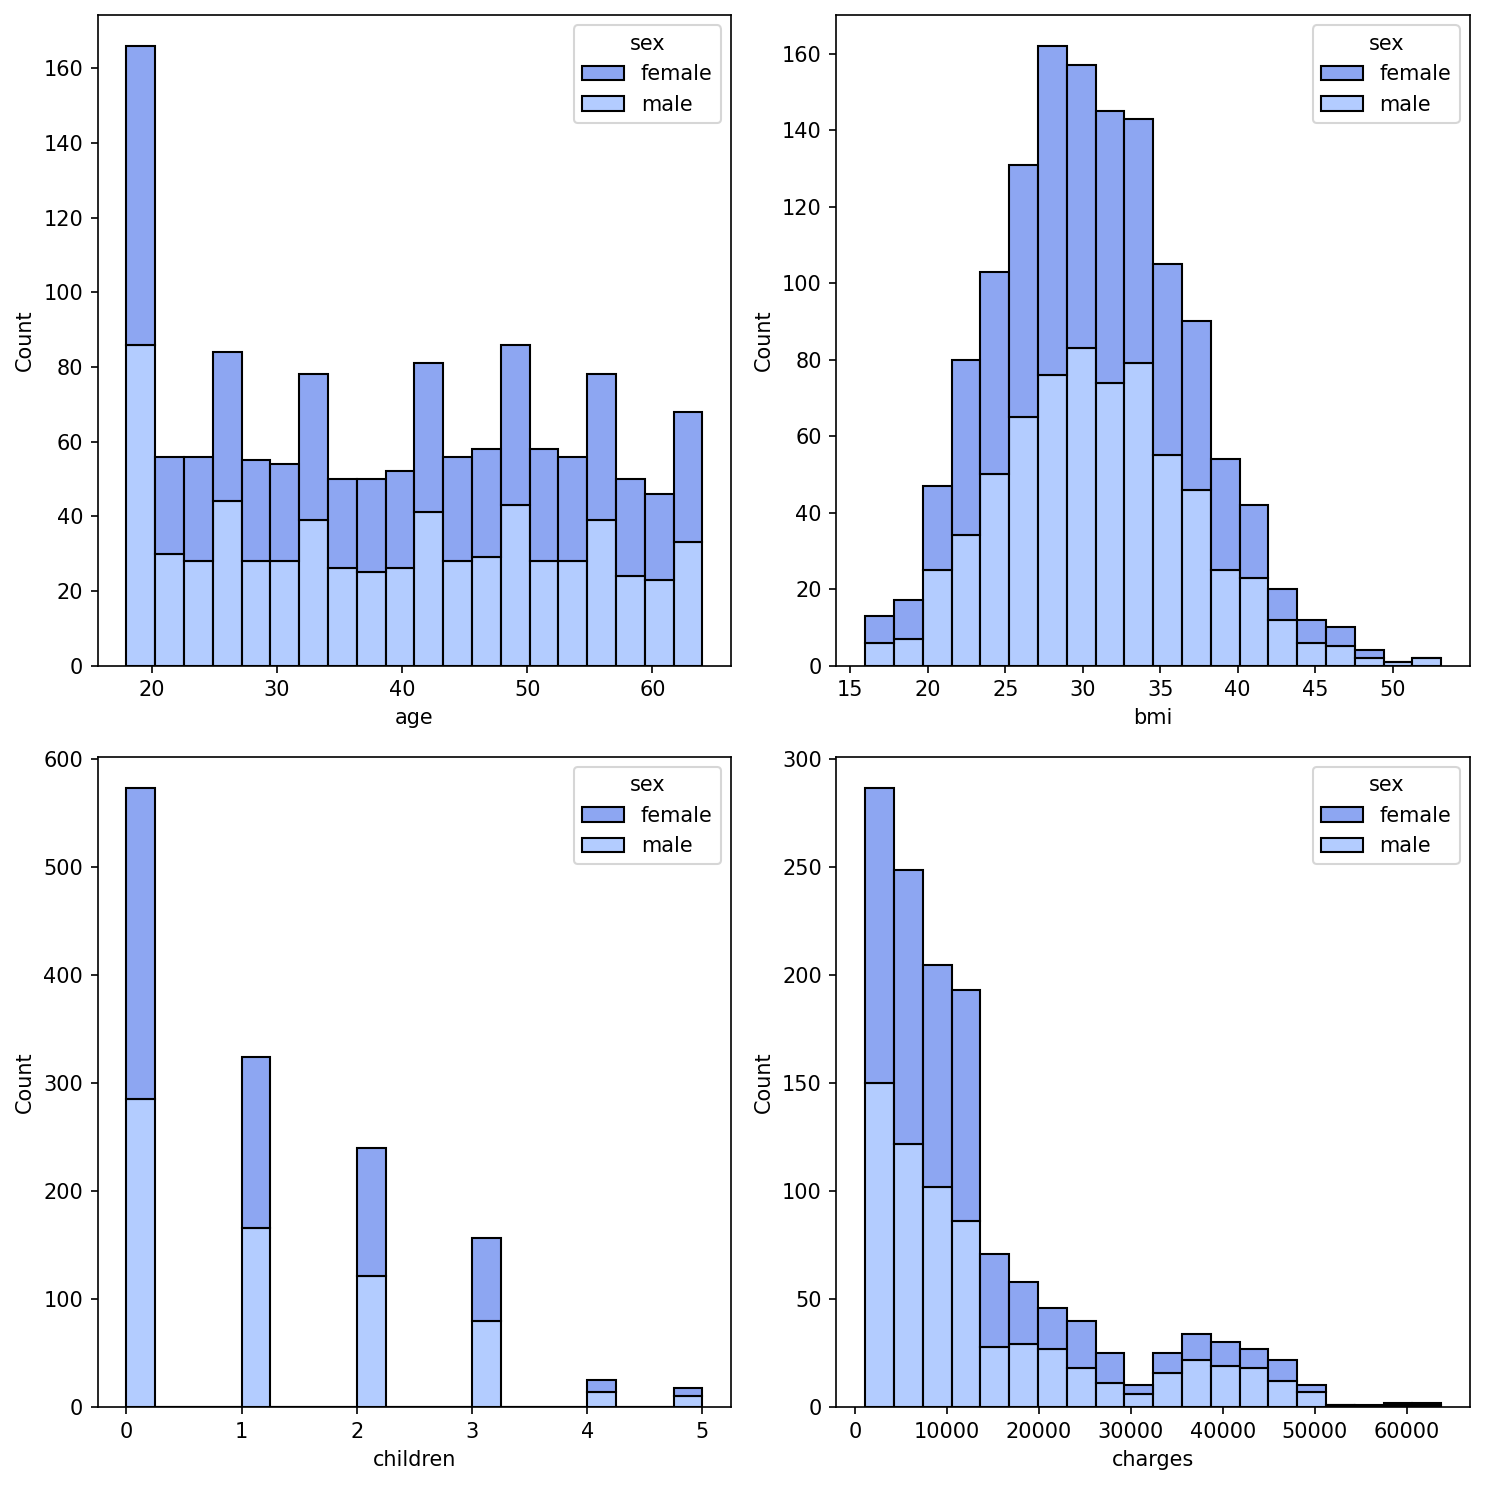

In [83]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi=150, sharex=False, sharey=False)
sns.histplot(data=raw_df, x="age", hue="sex", bins=20, multiple="stack", ax=axis.flat[0])
sns.histplot(data=raw_df, x="bmi", hue="sex", bins=20, multiple="stack", ax=axis.flat[1])
sns.histplot(data=raw_df, x="children", hue="sex", bins=20, multiple="stack", ax=axis.flat[2])
sns.histplot(data=raw_df, x="charges", hue="sex", bins=20, multiple="stack", ax=axis.flat[3])
plt.tight_layout()
plt.show()

There are some appreciable outliers in `charges` and `bmi` but not as far away as considering as a null value, they can be considered as normal outliers.